In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [8]:
# Read the dataset into a DataFrame 
df=pd.read_csv("diabetes_data_upload.csv")

In [9]:
# Display the first few rows of the DataFrame
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [10]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [11]:
# Display the shape of the DataFrame (number of rows and columns)
df.shape

(520, 17)

In [12]:
# Check for missing values in the DataFrame
df.isnull().any()

Age                   False
Gender                False
Polyuria              False
Polydipsia            False
sudden weight loss    False
weakness              False
Polyphagia            False
Genital thrush        False
visual blurring       False
Itching               False
Irritability          False
delayed healing       False
partial paresis       False
muscle stiffness      False
Alopecia              False
Obesity               False
class                 False
dtype: bool

In [13]:
# Display the count of missing values for each column
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

C:\Users\Renuka\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

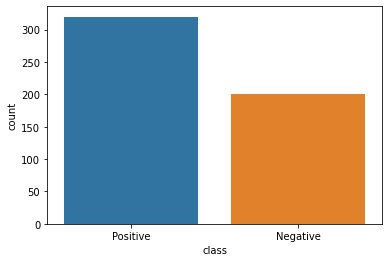

In [14]:
# Create a count plot for the 'class' column
sns.countplot(df['class'])

In [15]:
# Display the value counts of the 'class' column
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

C:\Users\Renuka\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Polyuria', ylabel='count'>

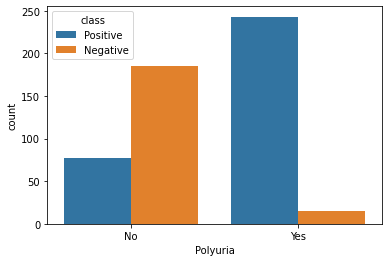

In [16]:
# Create count plots for Polyuria with 'hue' based on the 'class' column
sns.countplot(df['Polyuria'],hue=df['class'], data=df)

C:\Users\Renuka\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sudden weight loss', ylabel='count'>

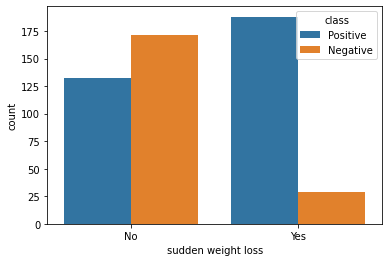

In [17]:
# Create count plots for sudden weight loss with 'hue' based on the 'class' column
sns.countplot(df['sudden weight loss'],hue=df['class'], data=df)

C:\Users\Renuka\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Polyphagia', ylabel='count'>

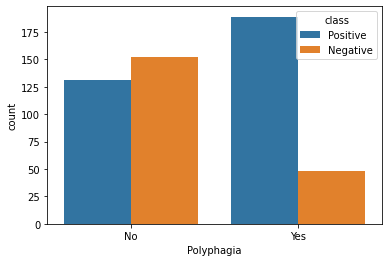

In [18]:
# Create count plots for Polyphagia with 'hue' based on the 'class' column
sns.countplot(df['Polyphagia'],hue=df['class'], data=df)

C:\Users\Renuka\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Polydipsia', ylabel='count'>

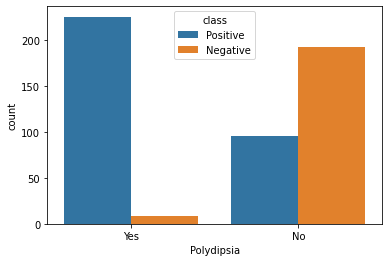

In [19]:
# Create count plots for Polydipsia with 'hue' based on the 'class' column
sns.countplot(df['Polydipsia'],hue=df['class'], data=df)

In [20]:
# Encode categorical columns using LabelEncoder
obj_columns = df.select_dtypes(include=np.object).columns.tolist()
encoder = LabelEncoder()
for i in obj_columns:
    df[i] = encoder.fit_transform(df[i].astype(str))

C:\Users\Renuka\AppData\Local\Temp\ipykernel_13272\3493573390.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj_columns = df.select_dtypes(include=np.object).columns.tolist()


In [21]:
# Display information about the DataFrame after encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  delayed healing     520 non-null    int32
 12  partial paresis     520 non-null    int32
 13  muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
 16  class               520 non-null    int32
dt

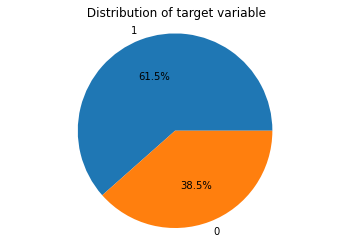

In [30]:
# Create a pie chart to visualize the distribution of the target variable
values = df['class']
labels = values.unique()
counts = values.value_counts()
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title(' Distribution of target variable')
plt.show()


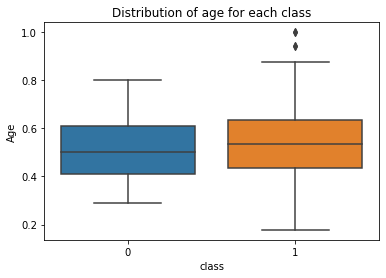

In [42]:
# Create a boxplot to compare the distribution of age for each class
sns.boxplot(x='class', y='Age', data=df)
plt.title('Distribution of age for each class')
plt.show()

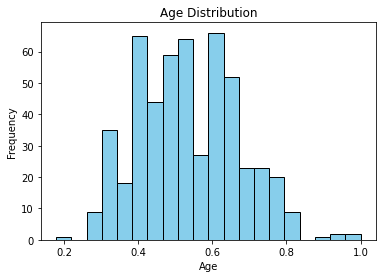

In [38]:
# Create a histogram of the 'Age' column
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


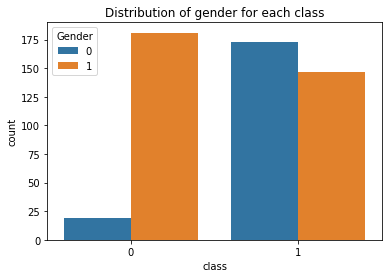

In [43]:
# Create a countplot to compare the distribution of gender for each class
sns.countplot(x='class', hue='Gender', data=df)
plt.title('Distribution of gender for each class')
plt.show()

<AxesSubplot:>

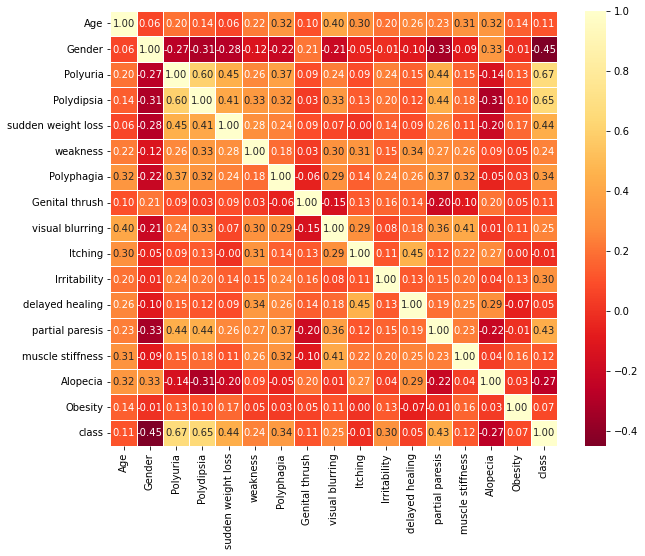

In [22]:
# Calculating the correlation matrix and create a heatmap
x=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(x,annot=True, cmap='YlOrRd_r',fmt='.2f',linewidth=0.5)

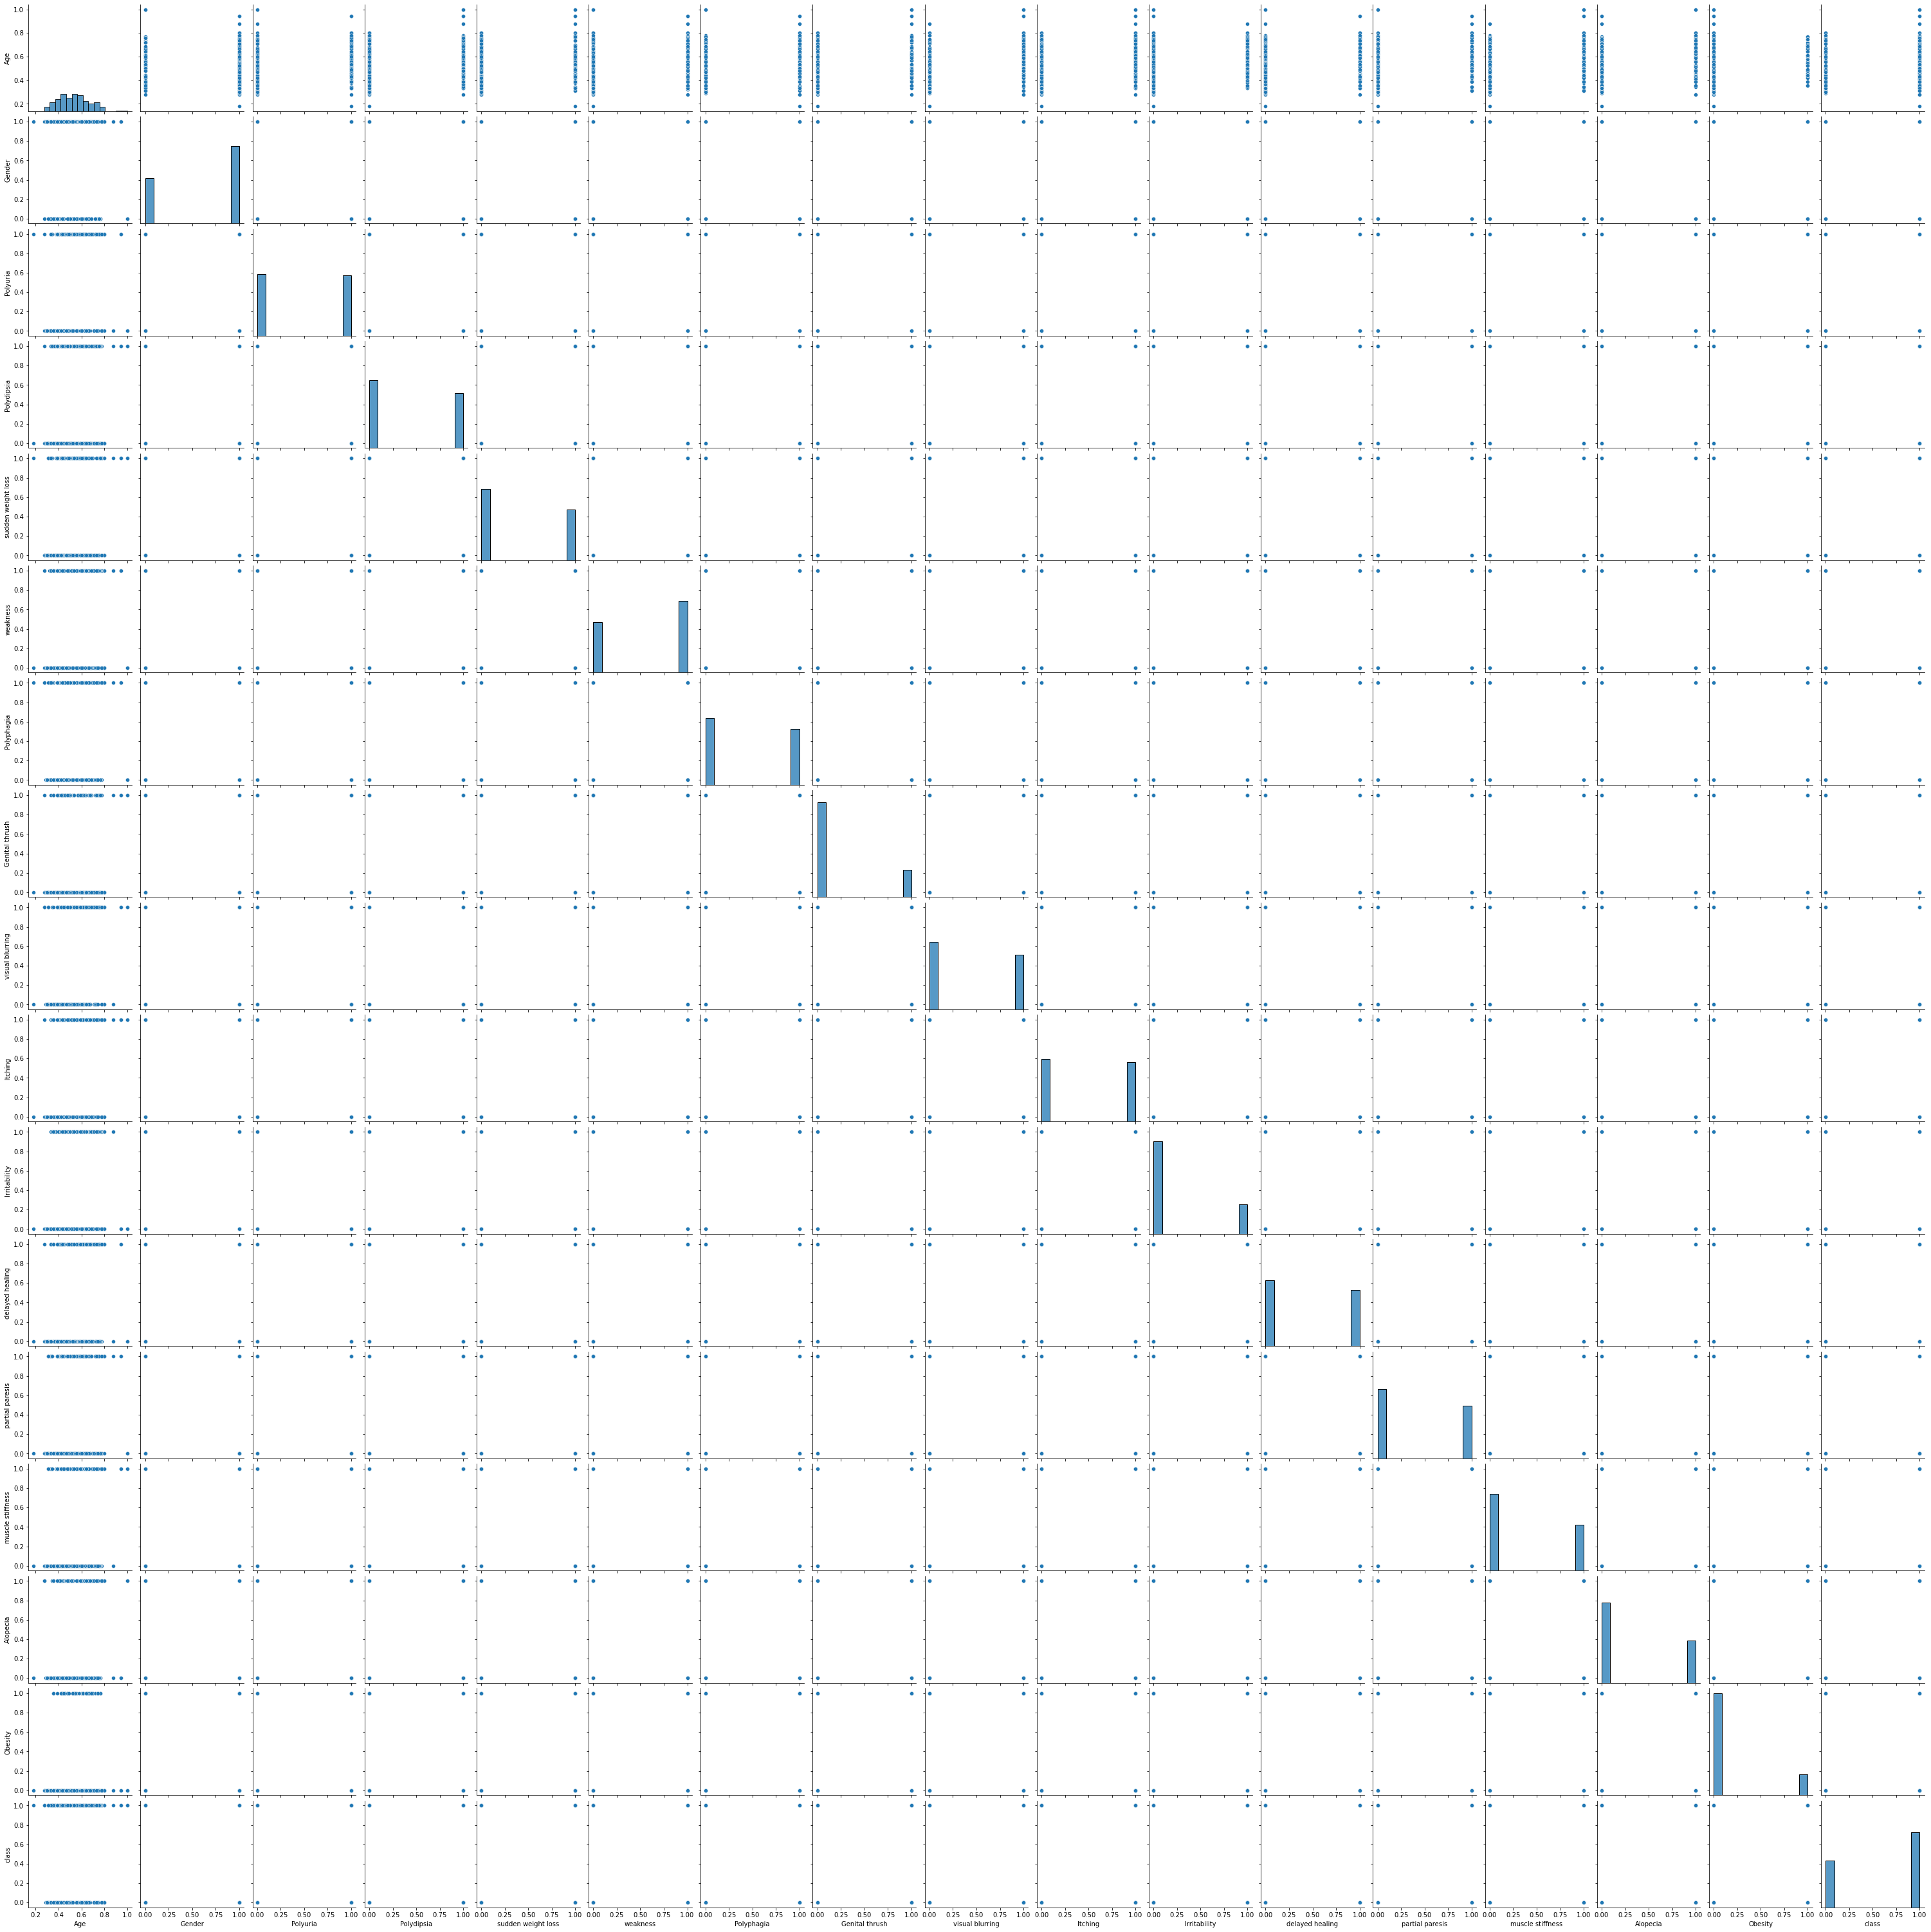

In [29]:
# Create a pair plot for the DataFrame
sns.pairplot(df)
plt.show()

In [23]:
# Split the data into features (X) and target variable (y)
X = df.drop('class', axis=1)  
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Normalize the 'Age' column by dividing by its maximum value
df['Age'] = df['Age']/df['Age'].max()
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.444444,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.644444,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.455556,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.500000,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.666667,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [25]:
# Create a Random Forest classifier, fit the model, and make predictions
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9904


In [26]:
# Perform cross-validation and calculate mean accuracy and standard deviation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5) 
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.95192308 0.99038462 0.93269231 1.         1.        ]
Mean accuracy: 0.975
Standard deviation: 0.027601346335398704


In [27]:
# Calculate various classification metrics and print the results
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9903846153846154
Precision: 1.0
Recall: 0.9859154929577465
F1 Score: 0.9929078014184397


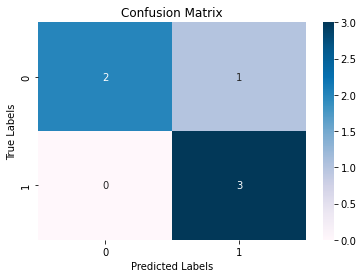

In [28]:
# Create a confusion matrix and visualize it using a heatmap
predicted_labels = [1, 0, 1, 1, 0, 1]
true_labels = [1, 0, 0, 1, 0, 1]

cm = confusion_matrix(true_labels, predicted_labels)

sns.heatmap(cm, annot=True, cmap='PuBu', fmt='d')

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()


In [49]:
def get_user_input():
    print("Please give inputs( 1 or 0)  based on your past 6 months experience")
    # Ask the user for input for each feature based on the provided attribute information
    age = float(input("Enter your age: "))
    sex = int(input("Enter your gender (1. Male, 0. Female): "))
    polyuria = int(input("Do you experience frequent urination (1. Yes, 0. No): "))
    polydipsia = int(input("Do you experience extreme thirstness (1. Yes, 0. No): "))
    sudden_weight_loss = int(input("Do you experience sudden weight loss (1. Yes, 0. No): "))
    weakness = int(input("Do you experience weakness (1. Yes, 0. No): "))
    polyphagia = int(input("Do you experience extreme hunger feelings (1. Yes, 0. No): "))
    genital_thrush = int(input("Do you experience rashes in genital parts (1. Yes, 0. No): "))
    visual_blurring = int(input("Do you experience visual blurring (1. Yes, 0. No): "))
    itching = int(input("Do you experience Itching (1. Yes, 0. No): "))
    irritability = int(input("Do you experience Irritability (1. Yes, 0. No): "))
    delayed_healing = int(input("Do you experience delayed healing (1. Yes, 0. No): "))
    partial_paresis = int(input("Do you experience partial paresis (1. Yes, 0. No): "))
    muscle_stiffness = int(input("Do you experience muscle stiffness (1. Yes, 0. No): "))
    alopecia = int(input("Do you experience hairfall (1. Yes, 0. No): "))
    obesity = int(input("Do you experience Obesity (1. Yes, 0. No): "))

    # Create a dictionary with user input
    user_data = {
        'Age': age,
        'Gender': sex,
        'Polyuria': polyuria,
        'Polydipsia': polydipsia,
        'sudden weight loss': sudden_weight_loss,
        'weakness': weakness,
        'Polyphagia': polyphagia,
        'Genital thrush': genital_thrush,
        'visual blurring': visual_blurring,
        'Itching': itching,
        'Irritability': irritability,
        'delayed healing': delayed_healing,
        'partial paresis': partial_paresis,
        'muscle stiffness': muscle_stiffness,
        'Alopecia': alopecia,
        'Obesity': obesity
    }

    return user_data

# Get user input
user_data = get_user_input()

# Make a prediction and display the result
user_data_df = pd.DataFrame([user_data])
prediction = rf_classifier.predict(user_data_df)
if prediction[0] == 1:
    print("Positive")
else:
    print("Negative")

Please give inputs( 1 or 0)  based on your past 6 months experience
Enter your age: 19
Enter your gender (1. Male, 0. Female): 0
Do you experience frequent urination (1. Yes, 0. No): 0
Do you experience extreme thirstness (1. Yes, 0. No): 0
Do you experience sudden weight loss (1. Yes, 0. No): 0
Do you experience weakness (1. Yes, 0. No): 0
Do you experience extreme hunger feelings (1. Yes, 0. No): 0
Do you experience rashes in genital parts (1. Yes, 0. No): 0
Do you experience visual blurring (1. Yes, 0. No): 0
Do you experience Itching (1. Yes, 0. No): 0
Do you experience Irritability (1. Yes, 0. No): 0
Do you experience delayed healing (1. Yes, 0. No): 0
Do you experience partial paresis (1. Yes, 0. No): 0
Do you experience muscle stiffness (1. Yes, 0. No): 0
Do you experience hairfall (1. Yes, 0. No): 0
Do you experience Obesity (1. Yes, 0. No): 0
Negative
